In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 48.0 MB/s eta 0:00:00


In [ ]:

from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'benchmark', 'predict', 'train', 'track', 'export', 'val'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'classify', 'pose', 'detect', 'segment'}
                MODE (required) is one of {'benchmark', 'predict', 'train', 'track', 'export', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eyGJXU5pdQYr21BPhMPb")
project = rf.workspace("haarthi-vallabhaneni-zppdp").project("detecting-an-object")
version = project.version(2)
dataset = version.download("yolov8")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detecting-an-Object-2 in yolov8:: 100%|██████████| 90/90 [00:00<00:00, 6624.56it/s]


In [12]:

!yolo task=detect mode=train model=yolov8s.pt data=/content/Detecting-an-Object-2/data.yaml epochs=10 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Detecting-an-Object-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

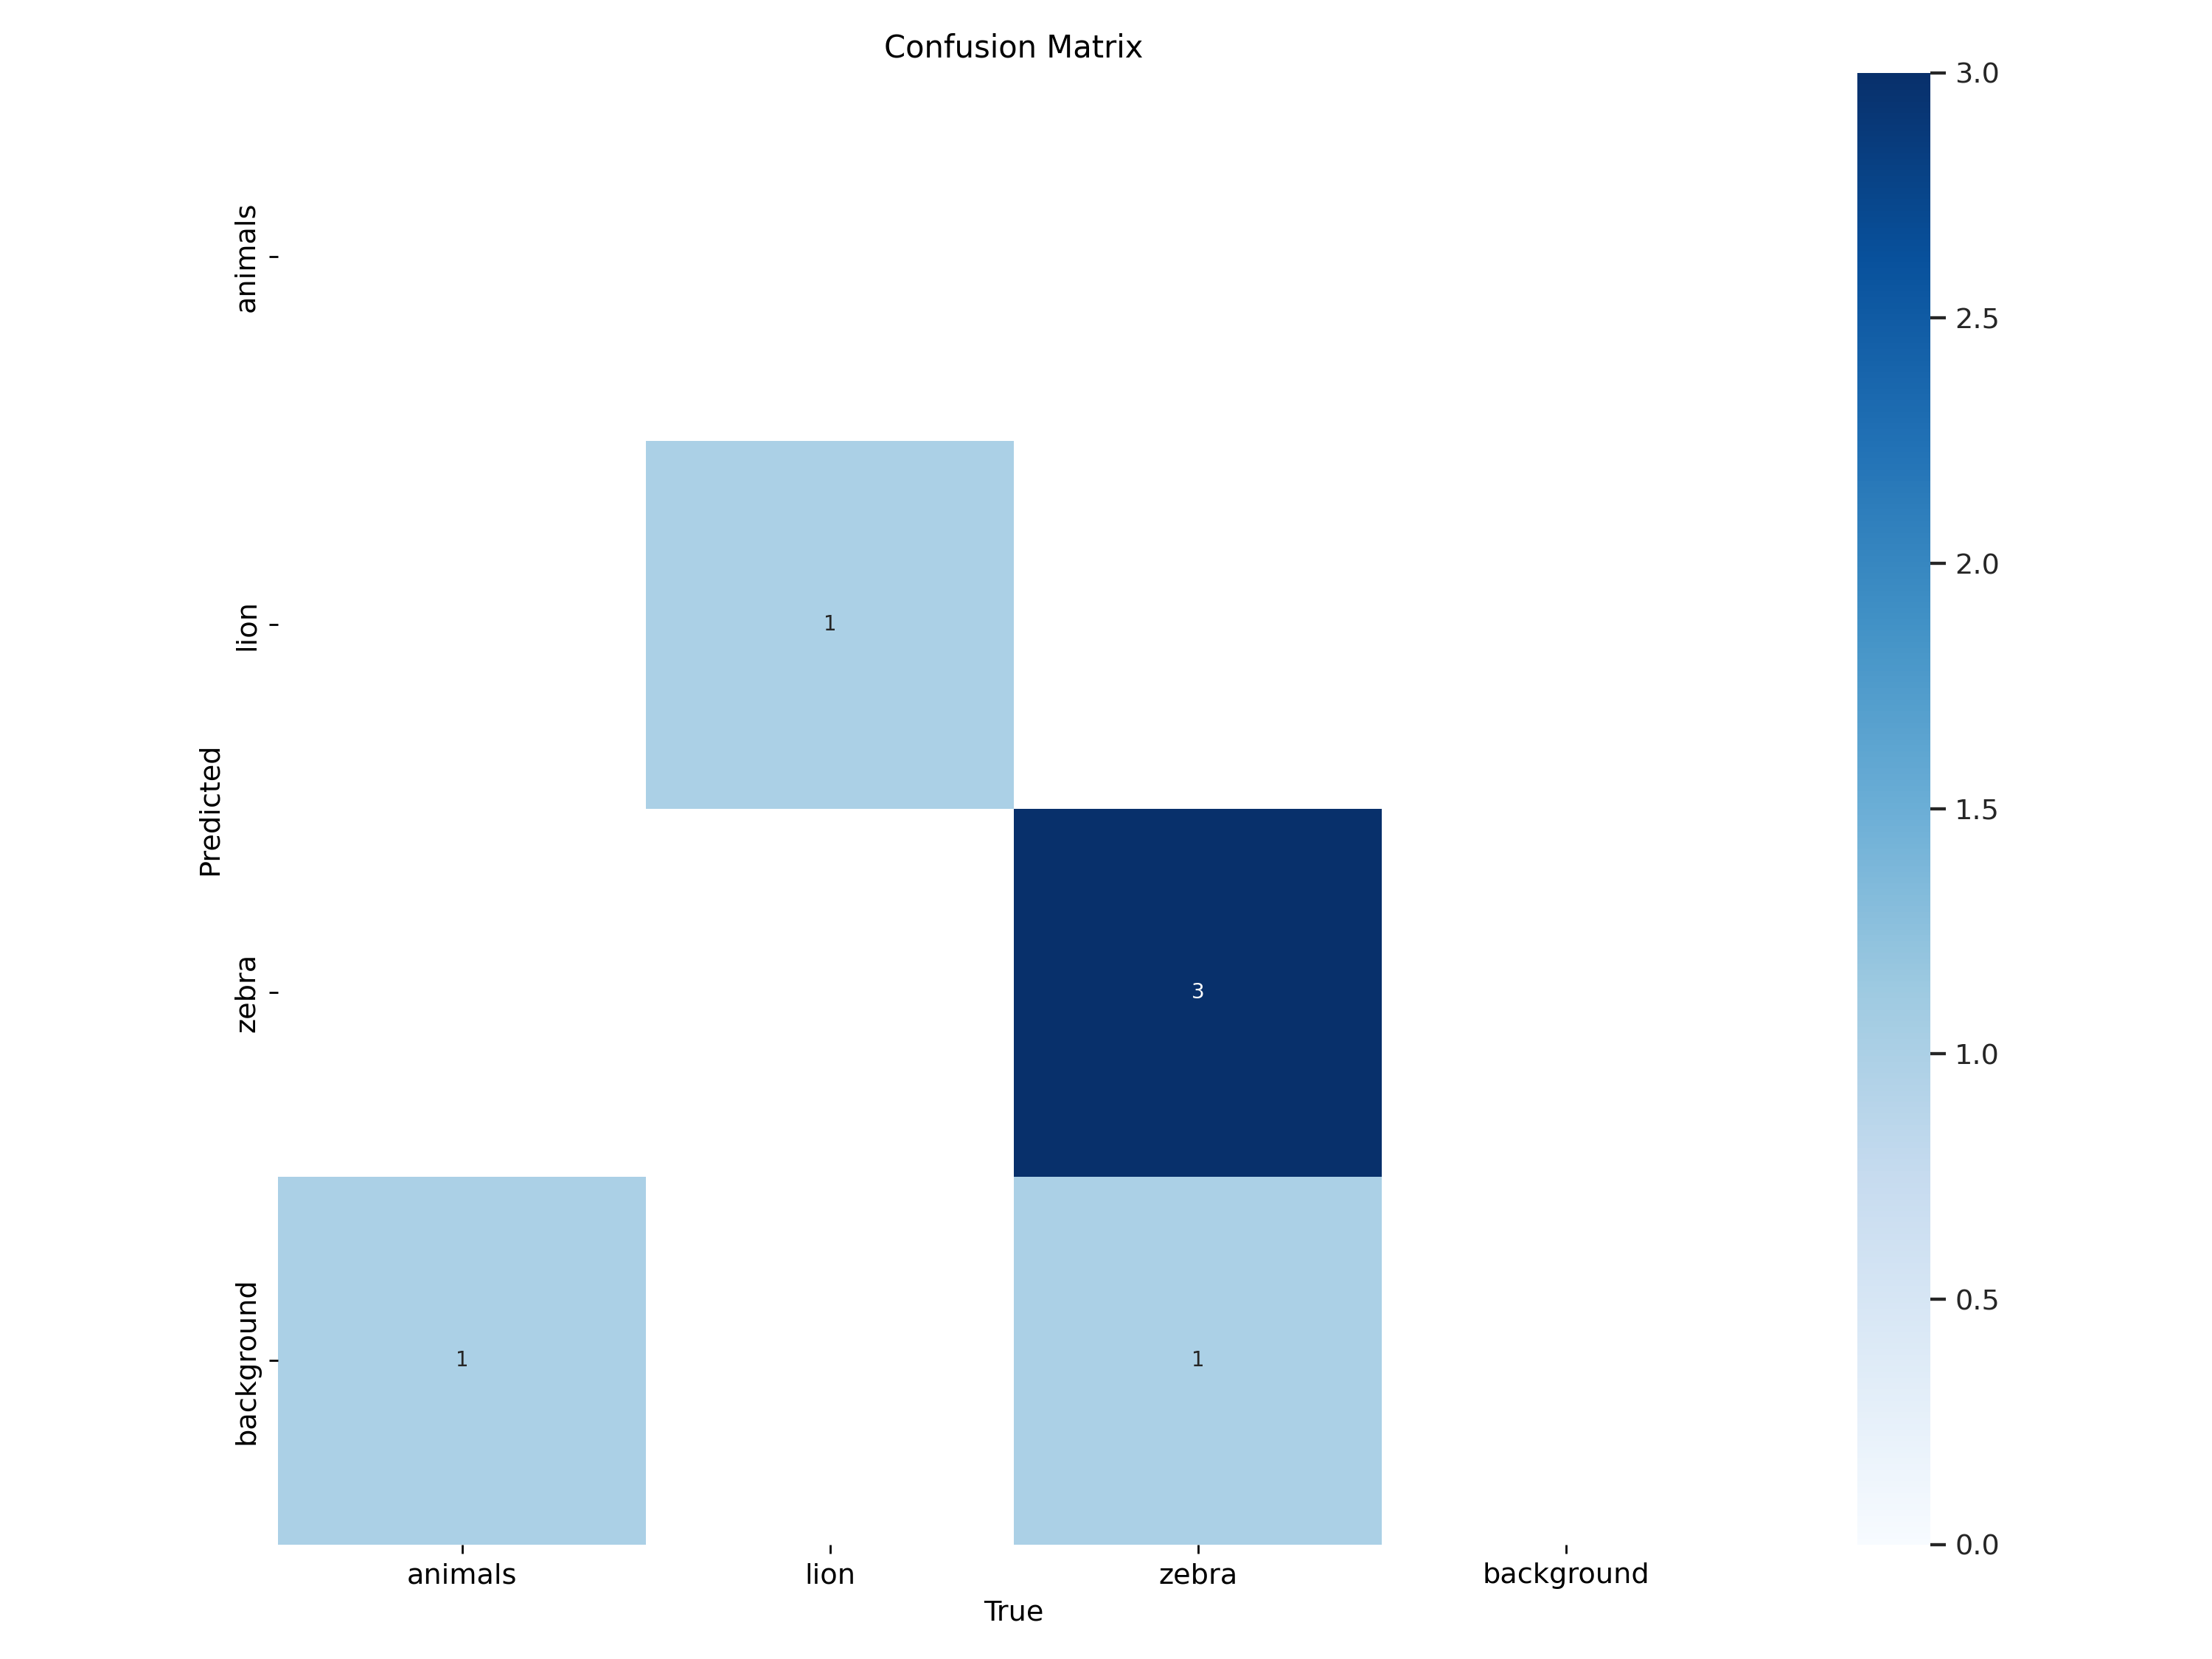

In [14]:

Image(filename='/content/runs/detect/train5/confusion_matrix.png', width=600)

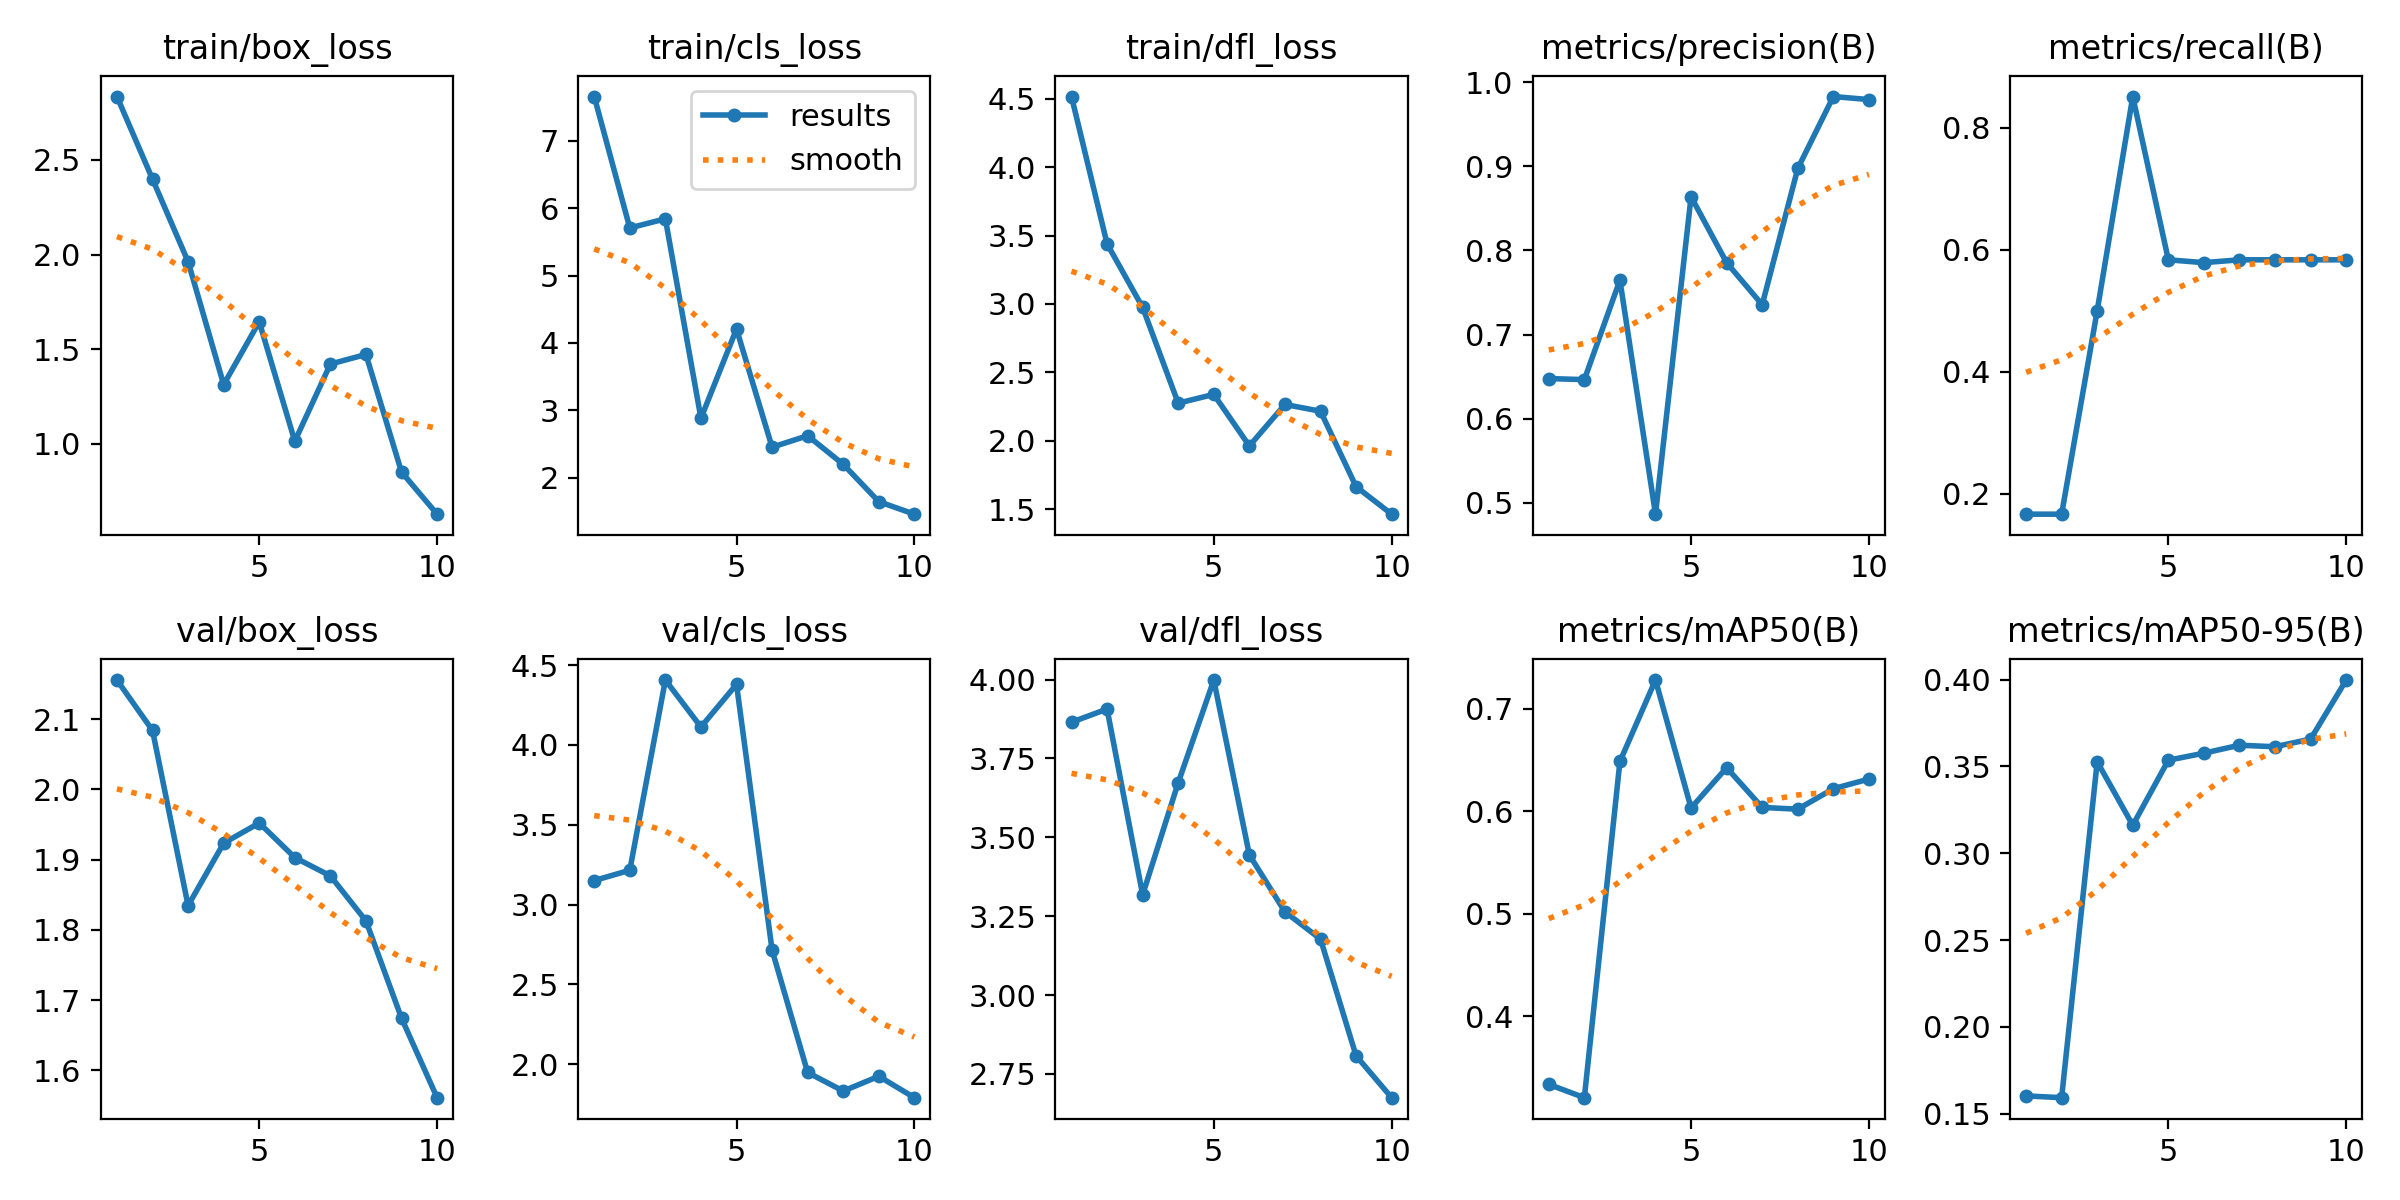

In [15]:
Image(filename='/content/runs/detect/train5/results.png', width=600)

In [16]:


!yolo task=detect mode=predict model=/content/runs/detect/train5/weights/best.pt source=/content/Detecting-an-Object-2/test/images

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /content/Detecting-an-Object-2/test/images/lion5_jpg.rf.d06cac8aff6e439b361532dafc5afb8c.jpg: 640x640 1 lion, 16.9ms
image 2/2 /content/Detecting-an-Object-2/test/images/zebra5_jpg.rf.675a78a21a4ec8522b21f85ded58d3f7.jpg: 640x640 1 zebra, 16.3ms
Speed: 5.7ms preprocess, 16.6ms inference, 463.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [17]:
!yolo task=detect mode=val model=/content/runs/detect/train5/weights/best.pt data=/content/Detecting-an-Object-2/data.yaml

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Detecting-an-Object-2/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.22s/it]
                   all          4          6       0.98      0.583      0.631        0.4
               animals          1          1          1          0     0.0711     0.0253
                  lion          1          1      0.952          1      0.995      0.796
                 zebra          3          4      0.987       0.75      0.828      0.378
Speed: 0.3ms preprocess, 22.7ms inference, 0.0ms loss, 239.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


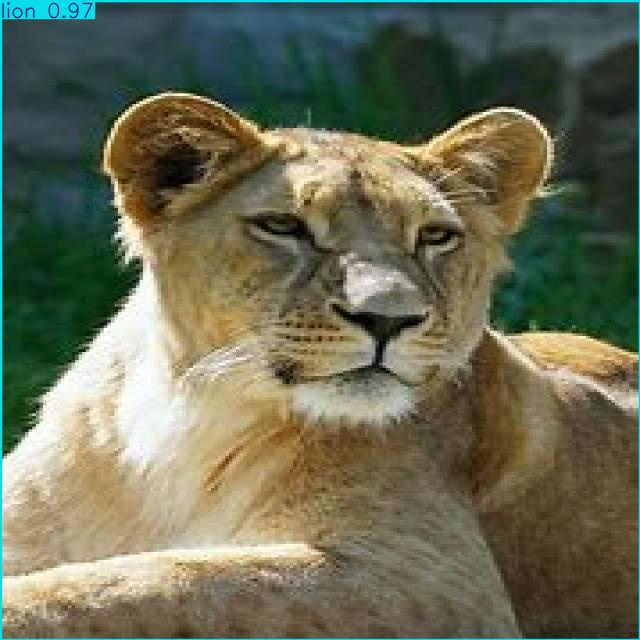

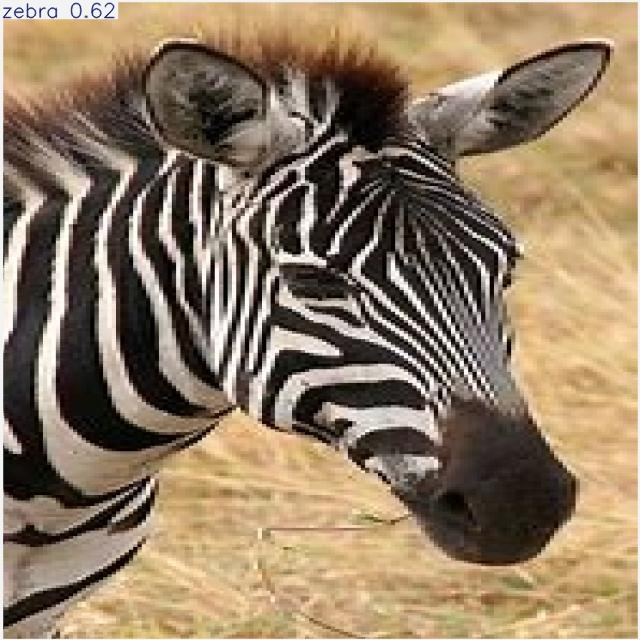

In [21]:
import glob
from IPython.display import Image,display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path,width=600))
  print("\n")